In [1]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
student = pd.read_csv("/Users/shreyaspeherkar/Desktop/Dataset/StudentsPerformance.csv")

In [7]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   991 non-null    float64
 6   reading_score                995 non-null    float64
 7   writing_score                994 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [8]:
student.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test_preparation_course        0
math_score                     9
reading_score                  5
writing_score                  6
dtype: int64

In [9]:
#filling missing value by mean
student['math_score'].fillna(int(student['math_score'].mean()), inplace=True)

In [10]:
student.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  5
writing_score                  6
dtype: int64

In [11]:
# filling a missing value with previous ones
student['reading_score'].fillna(method ='pad',inplace=True)

In [12]:
student.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  6
dtype: int64

In [13]:
#filling missing value by median
student['writing_score'].fillna(int(student['writing_score'].median()), inplace=True)

In [14]:
student.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [15]:
#Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

In [18]:
from numpy.random import seed 
from numpy.random import randn 
from numpy import mean
from numpy import std
seed(1)
#univariate dataset- single variable/ attribute #multivariate detaset-muliple variables/attributes
data=5*randn(10000)+50
print('mean=%.3f stdv=%.3f' %(mean(data), std(data)))

mean=50.049 stdv=4.994


In [19]:
#Standard Deviation Method 
data_mean = mean(data)
data_std = std(data)
cut_off = data_std * 3
lower = data_mean - cut_off
upper = data_mean + cut_off

In [21]:
outliers=[x for x in data if x<lower or x > upper]
outliers

[65.15428556186015,
 69.79301352018982,
 66.60539378085183,
 34.73117809786848,
 34.23321274904475,
 34.91984007395351,
 67.1633171589778,
 34.679293219474495,
 68.70124451852294,
 65.67523670043954,
 66.19171598376188,
 33.73482882511691,
 65.66014864070253,
 65.06377284118616,
 34.0469182658796,
 33.6969245211173,
 67.02151137874486,
 65.59239795391275,
 66.49270261640393,
 65.74492012609815,
 33.525707966507426,
 34.72183379792847,
 70.1342452227369,
 33.90433947188079,
 65.55945915508362,
 68.06638503541573,
 66.99057828251213,
 67.80436660352774,
 31.717799503726024]

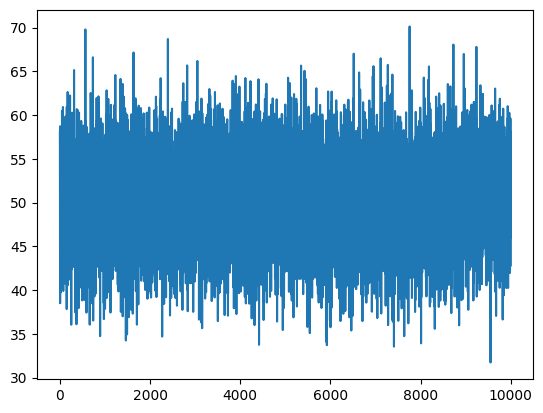

In [22]:
import matplotlib.pyplot as plt
plt.plot(data)

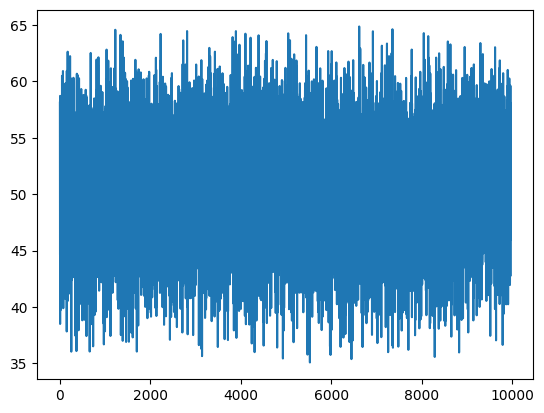

In [23]:
outliers_removed=[x for x in data if x>=lower and x<=upper] 
plt.plot(outliers_removed)

In [24]:
#Interquartile Range Method
from numpy.lib.function_base import percentile 
q25=percentile(data,25) 
q75=percentile(data,75)
IQR=q75-q25
cut_off_IQR= IQR * 2
lower=q25-cut_off_IQR
upper= q75 +cut_off_IQR

In [25]:
outliers_IQR = [x for x in data if x < lower or x > upper] 
outliers_IQR

[69.79301352018982,
 67.1633171589778,
 68.70124451852294,
 67.02151137874486,
 70.1342452227369,
 68.06638503541573,
 66.99057828251213,
 67.80436660352774,
 31.717799503726024]

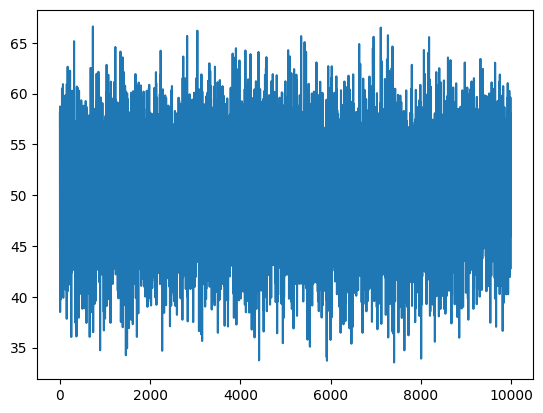

In [26]:
outliers_removed=[x for x in data if x>=lower and x<=upper] 
plt.plot(outliers_removed)

In [27]:
#Apply data transformations on at least one of the variables.The purpose of this transformation should be one of the
#following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation
#into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
mms = MinMaxScaler()

In [32]:
student[['math_score','reading_score','writing_score']] = mms.fit_transform(student[['math_score','reading_score','writing_score']])

In [33]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,0.72,0.662651,0.711111
1,female,group C,some college,standard,completed,0.69,0.879518,0.866667
2,female,group B,master's degree,standard,none,0.90,0.939759,0.922222
3,male,group A,associate's degree,free/reduced,none,0.47,0.481928,0.377778
4,male,group C,some college,standard,none,0.76,0.734940,0.722222
